In [54]:
import numpy as np
import numpy.linalg as la
import cvxpy as cp

from functools import partial

  
import matplotlib.pyplot as plt
import labellines as ll


from shapely.geometry import Point
from descartes import PolygonPatch


In [6]:
# The differentiable kernel function with parameters c,l not filled.
def h(r,c,l):
    return c * np.exp(-(r**2) / l**2)

def k(x1,x2,c,l):
    small_sig = 1e-10 # This is needed for numerical stability.
    return h(np.linalg.norm(x1-x2+small_sig,axis = -1),c,l)

def Gram(kernel,x):
    KA = kernel(x[:,np.newaxis,:],x)
    return KA

In [7]:
kernel = partial(k,c=1,l=1)

In [86]:
nx, ny = (10, 10)
x = np.linspace(-2, 4, nx)
y = np.linspace(-2, 4, ny)
xv, yv = np.meshgrid(x, y)

In [93]:
x_ref = np.array([xv.ravel(),yv.ravel()]).T

In [106]:
uniform_radius = 8
Rs = np.ones(len(x_ref))*uniform_radius

In [107]:
S = Gram(kernel,x_ref[:3])

In [108]:
sols = {'Reference points':x_ref}

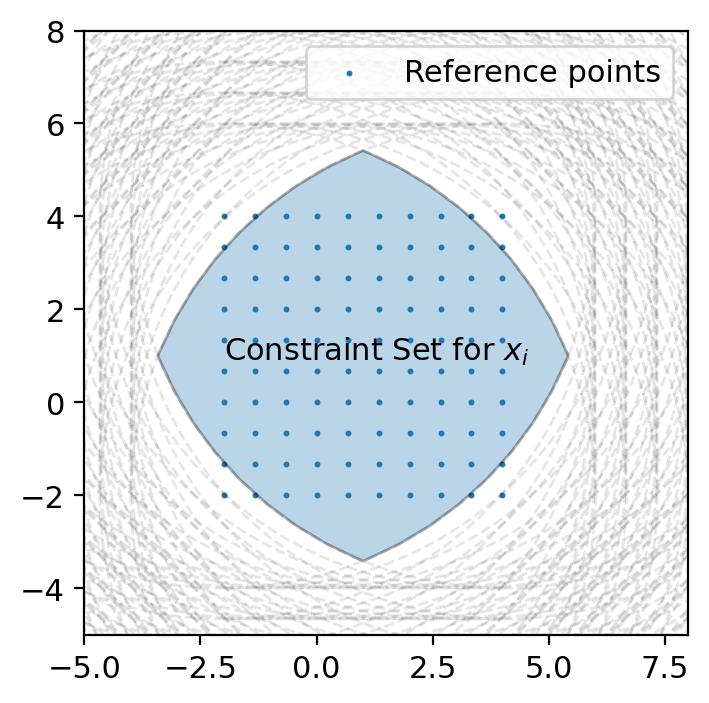

In [126]:
plt.rc('font',size=11)
plt.figure(dpi=200)
for key,val in sols.items():
    plt.scatter(val[:,0],val[:,1],marker = '.',s = 5,label=key)
    
    plt.gca().set_aspect('equal')

for i,val in enumerate(sols['Reference points']):
    circ = plt.Circle(val,Rs[i],fill=False,linestyle='--',alpha=0.1)
    plt.gca().add_patch(circ)
# ll.labelLines(plt.gca().get_lines(),fontsize=12,zorder=3,yoffsets=1.5,align=False)
# plt.legend()
# plt.show()


points = [Point(*x) for x in sols['Reference points']]
constraint_set  = None

for p,r in zip(points,Rs):
    
    if constraint_set is None:
        constraint_set = p.buffer(r)
    else:
        constraint_set = constraint_set.intersection(p.buffer(r))

plt.gca().add_patch(PolygonPatch(constraint_set,alpha=0.3))

plt.text(-2,0.9,r'Constraint Set for $x_i$')

plt.xlim((-5,8))
plt.ylim((-5,8))
plt.legend()
plt.show()